<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(3_6)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_3.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.6_n20.csv',
 'data_multi_delta_3.6_n30.csv',
 'data_multi_delta_3.6_n60.csv',
 'data_multi_delta_3.6_n120.csv',
 'data_multi_delta_3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.6_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,45.568958,51.169684,41.405277,25.924984,450.765918,624.834821,501.947582,122.887239
1,0.0,1.0,81.625025,41.943781,48.763598,92.768260,844.086567,1119.187231,-422.435067,1541.622298
2,0.0,2.0,58.497857,81.076318,23.259934,75.112050,868.731284,1116.677444,785.034627,331.642816
3,0.0,3.0,96.410260,74.654120,48.054116,53.665755,-1191.371520,-908.587268,254.493309,-1163.080578
4,0.0,4.0,55.241387,35.494171,53.928815,21.115254,-67.788531,107.991095,57.745475,50.245619
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,43.804779,53.549281,69.407939,75.472677,412.655649,664.890325,675.975999,-11.085673
29996,999.0,26.0,48.929357,36.733280,93.351348,98.250200,630.851762,918.115948,37.139266,880.976682
29997,999.0,27.0,28.143258,56.011826,91.614779,85.145115,25.241218,296.156196,949.769682,-653.613486
29998,999.0,28.0,80.928887,73.672595,79.468925,91.100069,-3637.334722,-3302.164246,-72.134620,-3230.029627


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,45.568958,51.169684,41.405277,25.924984,450.765918,624.834821,501.947582,122.887239
1,0.0,1.0,81.625025,41.943781,48.763598,92.768260,844.086567,1119.187231,-422.435067,1541.622298
2,0.0,2.0,58.497857,81.076318,23.259934,75.112050,868.731284,1116.677444,785.034627,331.642816
3,0.0,3.0,96.410260,74.654120,48.054116,53.665755,-1191.371520,-908.587268,254.493309,-1163.080578
4,0.0,4.0,55.241387,35.494171,53.928815,21.115254,-67.788531,107.991095,57.745475,50.245619
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,43.804779,53.549281,69.407939,75.472677,412.655649,664.890325,675.975999,-11.085673
29996,999.0,26.0,48.929357,36.733280,93.351348,98.250200,630.851762,918.115948,37.139266,880.976682
29997,999.0,27.0,28.143258,56.011826,91.614779,85.145115,25.241218,296.156196,949.769682,-653.613486
29998,999.0,28.0,80.928887,73.672595,79.468925,91.100069,-3637.334722,-3302.164246,-72.134620,-3230.029627


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    45.568958  51.169684  41.405277  25.924984   450.765918   
      1.0    81.625025  41.943781  48.763598  92.768260   844.086567   
      2.0    58.497857  81.076318  23.259934  75.112050   868.731284   
      3.0    96.410260  74.654120  48.054116  53.665755 -1191.371520   
      4.0    55.241387  35.494171  53.928815  21.115254   -67.788531   
...                ...        ...        ...        ...          ...   
999.0 25.0   43.804779  53.549281  69.407939  75.472677   412.655649   
      26.0   48.929357  36.733280  93.351348  98.250200   630.851762   
      27.0   28.143258  56.011826  91.614779  85.145115    25.241218   
      28.0   80.928887  73.672595  79.468925  91.100069 -3637.334722   
      29.0   91.305389  24.997886  79.877367  50.498396  -489.596680   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0     624.834821  501.947582   122.887239  
      1.0    1119.187231 -422.435067  1541.622298  
      2.0    1116.677444  785.034627   331.642816  
      3.0    -908.587268  254.493309 -1163.080578  
      4.0     107.991095   57.745475    50.245619  
...                  ...         ...          ...  
999.0 25.0    664.890325  675.975999   -11.085673  
      26.0    918.115948   37.139266   880.976682  
      27.0    296.156196  949.769682  -653.613486  
      28.0  -3302.164246  -72.134620 -3230.029627  
      29.0   -232.917643 -313.965181    81.047538  

[30000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    45.568958  51.169684  41.405277  25.924984   450.765918   
      1.0    81.625025  41.943781  48.763598  92.768260   844.086567   
      2.0    58.497857  81.076318  23.259934  75.112050   868.731284   
      3.0    96.410260  74.654120  48.054116  53.665755 -1191.371520   
      4.0    55.241387  35.494171  53.928815  21.115254   -67.788531   
...                ...        ...        ...        ...          ...   
999.0 25.0   43.804779  53.549281  69.407939  75.472677   412.655649   
      26.0   48.929357  36.733280  93.351348  98.250200   630.851762   
      27.0   28.143258  56.011826  91.614779  85.145115    25.241218   
      28.0   80.928887  73.672595  79.468925  91.100069 -3637.334722   
      29.0   91.305389  24.997886  79.877367  50.498396  -489.596680   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0     624.834821  501.947582   122.887239  
      1.0    1119.187231 -422.435067  1541.622298  
      2.0    1116.677444  785.034627   331.642816  
      3.0    -908.587268  254.493309 -1163.080578  
      4.0     107.991095   57.745475    50.245619  
...                  ...         ...          ...  
999.0 25.0    664.890325  675.975999   -11.085673  
      26.0    918.115948   37.139266   880.976682  
      27.0    296.156196  949.769682  -653.613486  
      28.0  -3302.164246  -72.134620 -3230.029627  
      29.0   -232.917643 -313.965181    81.047538  

[30000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,45.568958,51.169684,41.405277,25.924984,450.765918,624.834821,501.947582,122.887239
1,0.0,1.0,81.625025,41.943781,48.763598,92.768260,844.086567,1119.187231,-422.435067,1541.622298
2,0.0,2.0,58.497857,81.076318,23.259934,75.112050,868.731284,1116.677444,785.034627,331.642816
3,0.0,3.0,96.410260,74.654120,48.054116,53.665755,-1191.371520,-908.587268,254.493309,-1163.080578
4,0.0,4.0,55.241387,35.494171,53.928815,21.115254,-67.788531,107.991095,57.745475,50.245619
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,43.804779,53.549281,69.407939,75.472677,412.655649,664.890325,675.975999,-11.085673
29996,999.0,26.0,48.929357,36.733280,93.351348,98.250200,630.851762,918.115948,37.139266,880.976682
29997,999.0,27.0,28.143258,56.011826,91.614779,85.145115,25.241218,296.156196,949.769682,-653.613486
29998,999.0,28.0,80.928887,73.672595,79.468925,91.100069,-3637.334722,-3302.164246,-72.134620,-3230.029627


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    45.568958  51.169684  41.405277  25.924984   450.765918   
      1.0    81.625025  41.943781  48.763598  92.768260   844.086567   
      2.0    58.497857  81.076318  23.259934  75.112050   868.731284   
      3.0    96.410260  74.654120  48.054116  53.665755 -1191.371520   
      4.0    55.241387  35.494171  53.928815  21.115254   -67.788531   
...                ...        ...        ...        ...          ...   
999.0 25.0   43.804779  53.549281  69.407939  75.472677   412.655649   
      26.0   48.929357  36.733280  93.351348  98.250200   630.851762   
      27.0   28.143258  56.011826  91.614779  85.145115    25.241218   
      28.0   80.928887  73.672595  79.468925  91.100069 -3637.334722   
      29.0   91.305389  24.997886  79.877367  50.498396  -489.596680   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0     624.834821  501.947582   122.887239  
      1.0    1119.187231 -422.435067  1541.622298  
      2.0    1116.677444  785.034627   331.642816  
      3.0    -908.587268  254.493309 -1163.080578  
      4.0     107.991095   57.745475    50.245619  
...                  ...         ...          ...  
999.0 25.0    664.890325  675.975999   -11.085673  
      26.0    918.115948   37.139266   880.976682  
      27.0    296.156196  949.769682  -653.613486  
      28.0  -3302.164246  -72.134620 -3230.029627  
      29.0   -232.917643 -313.965181    81.047538  

[30000 rows x 8 columns]

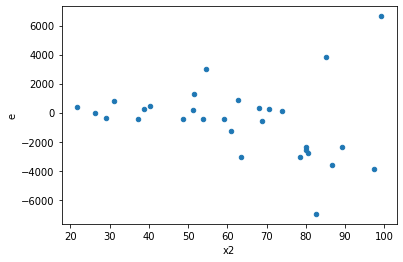

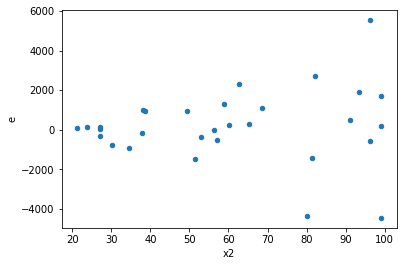

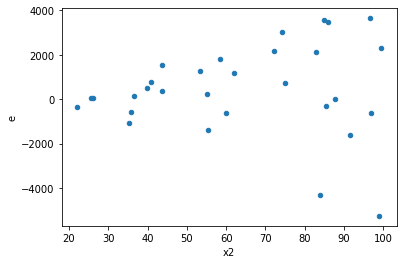

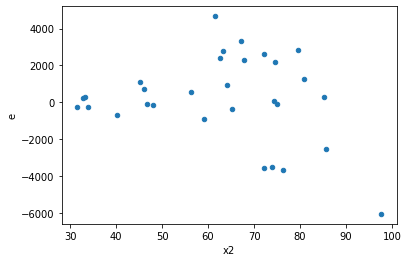

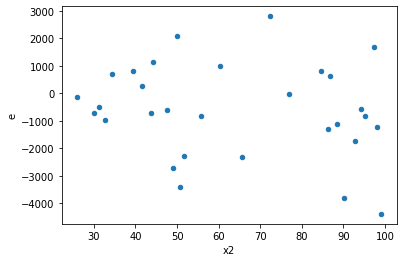

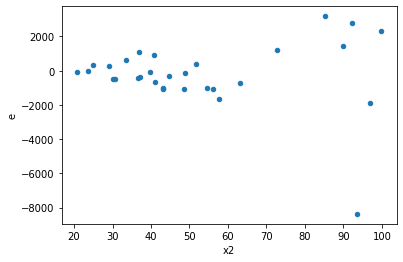

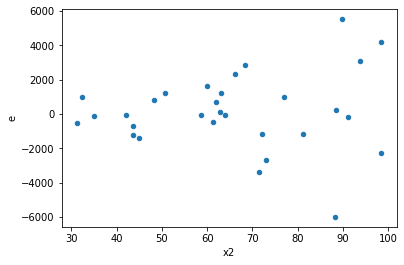

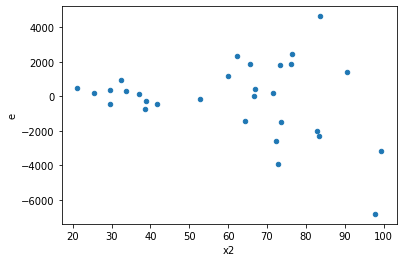

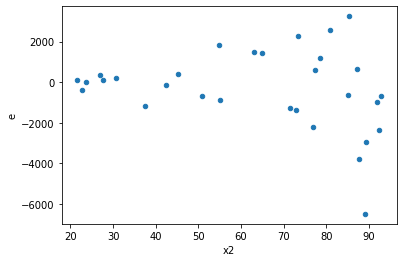

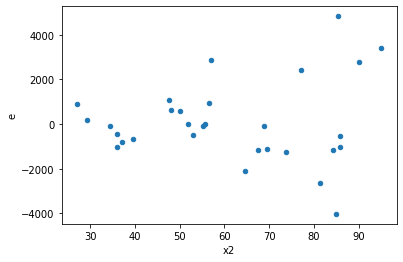

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,8.0,8.0,6105078.39514726,57090841.48700209,763134.7993934075,7136355.185875261,9.351369104839318,0.004793947920788133,0.9976030260396059,0.0023969739603940665,Reject005=0 : Heteroscedasticity
2.0,8.0,8.0,20269178.61637872,26038751.38413025,2533647.32704734,3254843.9230162813,1.284647586216906,0.7316476220604968,0.6341761889697516,0.3658238110302484,Reject005=1 : Homoscedasticity
3.0,8.0,8.0,3485148.1506753177,16374709.60574499,435643.5188344147,2046838.7007181237,4.698425690331717,0.042310269301525816,0.9788448653492371,0.021155134650762908,Reject005=0 : Heteroscedasticity
4.0,8.0,8.0,33486878.572837543,59617218.98324029,4185859.821604693,7452152.372905036,1.7803157990245781,0.4321785735081529,0.7839107132459235,0.21608928675407646,Reject005=1 : Homoscedasticity
6.0,8.0,8.0,37322963.12890026,62948122.08646413,4665370.3911125325,7868515.260808016,1.6865788996726672,0.4760673787444052,0.7619663106277974,0.2380336893722026,Reject005=1 : Homoscedasticity
7.0,8.0,8.0,18992174.34621567,24945889.931879878,2374021.7932769586,3118236.2414849848,1.3134825679846673,0.708971073732483,0.6455144631337585,0.3544855368662415,Reject005=1 : Homoscedasticity
19.0,8.0,8.0,20227524.22013647,48512873.00054306,2528440.527517059,6064109.125067882,2.3983594073390635,0.23743143105673714,0.8812842844716314,0.11871571552836857,Reject005=1 : Homoscedasticity
21.0,8.0,8.0,14946945.204153135,16585515.908176359,1868368.150519142,2073189.4885220448,1.1096257918686911,0.8866339632645408,0.5566830183677296,0.4433169816322704,Reject005=1 : Homoscedasticity
22.0,8.0,8.0,7816584.518731831,32696015.45654017,977073.0648414788,4087001.9320675214,4.182903079751359,0.05891154163772394,0.970544229181138,0.02945577081886197,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,8.0,8.0,6105078.39514726,57090841.48700209,763134.7993934075,7136355.185875261,9.351369104839318,0.004793947920788133,Reject005=0 : Heteroscedasticity
1.0,8.0,8.0,29255915.00401405,2304576.994809091,3656989.375501756,288072.1243511364,0.07877302742002402,0.0016621639627521804,Reject005=0 : Heteroscedasticity
2.0,8.0,8.0,20269178.61637872,26038751.38413025,2533647.32704734,3254843.9230162813,1.284647586216906,0.7316476220604968,Reject005=1 : Homoscedasticity
3.0,8.0,8.0,3485148.1506753177,16374709.60574499,435643.5188344147,2046838.7007181237,4.698425690331717,0.042310269301525816,Reject005=0 : Heteroscedasticity
4.0,8.0,8.0,33486878.572837543,59617218.98324029,4185859.821604693,7452152.372905036,1.7803157990245781,0.4321785735081529,Reject005=1 : Homoscedasticity
5.0,8.0,8.0,27229458.84040999,9435455.335877905,3403682.355051249,1179431.916984738,0.3465164471750418,0.1550653720498387,Reject005=1 : Homoscedasticity
6.0,8.0,8.0,37322963.12890026,62948122.08646413,4665370.3911125325,7868515.260808016,1.6865788996726672,0.4760673787444052,Reject005=1 : Homoscedasticity
7.0,8.0,8.0,18992174.34621567,24945889.931879878,2374021.7932769586,3118236.2414849848,1.3134825679846673,0.708971073732483,Reject005=1 : Homoscedasticity
8.0,8.0,8.0,50151991.62050513,24799424.999408435,6268998.9525631415,3099928.1249260544,0.49448534740281275,0.3390765971916837,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      602
Reject005=0 : Heteroscedasticity    398
Name: Result_test, dtype: int64